In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('..')
import absorption_line_vel as vel
from absorption_line_vel import SpectrumSN_Lines, AbsorbLine

# read spec data
z = 0.0307
spec = '../../spectroscopy/SN2020jgb/ZTF20aayhacx_20200529_Lick_3-m_v1.ascii'
Spec1 = SpectrumSN_Lines(spec, z)
Spec = SpectrumSN_Lines(spec, 0)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '20'
mpl.rcParams['ytick.labelsize'] = '20'

# 20200529_Lick_3-m

## Na 5890 & 5896

<AxesSubplot:>

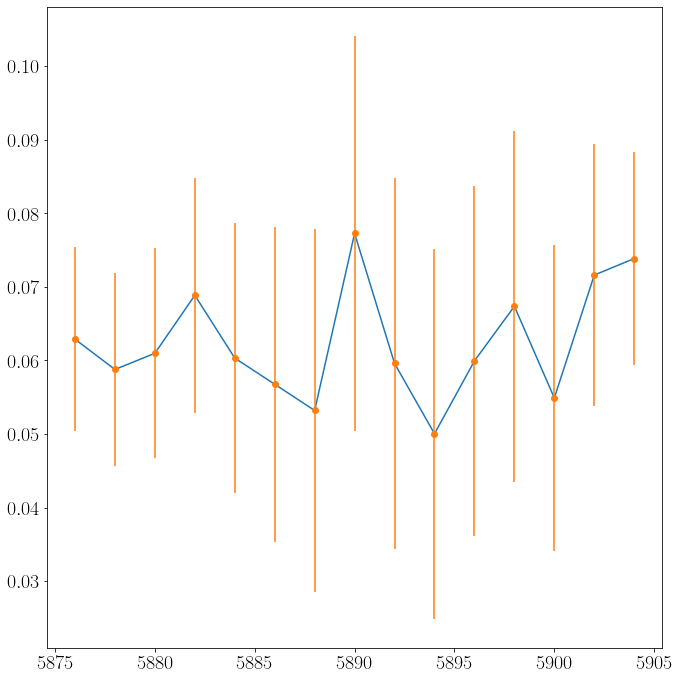

In [4]:
Spec.plot_line_region(5875, 5905)

In [5]:
Spec.add_line('NaI_5896', 5880, 5900, lines=[5889.950, 5895.924], rel_strength=[2, 1])

/Users/chang/Desktop/SNIa/SN2020jgb/rv/SN2020jgb/../absorption_line_vel.py:156: UserWarning: Too few points within the wavelength range!
  warnings.warn('Too few points within the wavelength range!')


In [ ]:
'''sampler = Spec.line['NaI_5896'].MCMC_sampler(initial=[1, 1, -100, 3, -5],
                                             normalize_unc=False,
                                             max_nsteps=1000)'''

sampler = Spec.line['NaI_5896'].MCMC_sampler(
    #initial=Spec.line['NaI_5896'].theta_MCMC,
    initial=[1, 1, -100, 8, -5],
    #Plot_mcmc=True,
    max_nsteps=20000,
    Plot_tau=True)

In [ ]:
sample = sampler.get_chain(discard=800, flat=True, thin=1)
logprob = sampler.get_log_prob(discard=800, flat=True, thin=1)

Na = Spec.line['NaI_5896']
ratio = 2 / (Na.red_vel - Na.blue_vel) / (Na.red_fl[0]+Na.blue_fl[0])*\
            (Na.wv_line[-1] - Na.wv_line[0]) * np.sum(Na.rel_strength) * 1000
sig = np.exp(sample[:, -2] / 2)
EW = sample[:, -1] * -ratio
p1 = np.percentile(EW, 68)
p2 = np.percentile(EW, 95)

In [ ]:
EBV1 = lambda EW: (2.47 * EW / 1000 - 1.76)
EBV2 = lambda EW: (2.16 * EW / 1000 - 1.91)
EBV = lambda EW: (1.17 * EW / 1000 - 1.85)

In [ ]:
import corner
paramsNames = [
    r'$\mathrm{Blue\ edge\ flux}$', r'$\mathrm{Red\ edge\ flux}$', r'$v$',
    r'$\ln(\sigma^2)$', r'$\mathrm{EW}$'
]
chain = sample.copy()
chain[:, -1] = -ratio * sample[:, -1]
fig = corner.corner(chain[::8],
                    labels=paramsNames,
                    quantiles=[0.16, 0.50, 0.84],
                    show_titles=True)

In [ ]:
the = Na.theta_MCMC
Na.plot_model(the)
print('sigma = {:.1f}, EW = {:.1f}, E(B-V) = {:.3f}'.format(
    np.exp(the[-2] / 2), -ratio * the[-1], 10**EBV(-ratio * the[-1])))

In [ ]:
the = Na.theta_MCMC
Na.plot_model(the)
print('sigma = {:.1f}, EW = {:.1f}, E(B-V) = {:.3f}'.format(
    np.exp(the[-2] / 2), -ratio * the[-1], 10**EBV(-ratio * the[-1])))

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(16, 7), sharey=True)
Range = 1000
ax[0].axvline(p1 / 3, color='k', linestyle='--')
ax[0].axvline(p2 / 3, color='k', linestyle='-.')
ax[0].text(p1 / 3 / Range, 0.8, r'$68\%$', transform=ax[0].transAxes)
ax[0].text(p2 / 3 / Range, 0.8, r'$95\%$', transform=ax[0].transAxes)
ax[0].hist(EW / 3, histtype='step', bins=100, range=[0, Range])
ax[0].set_xlabel(r'$\mathrm{Na\ D1,\ EW}\ [\mathrm{m\mathring{A}}]$')
ax02 = ax[0].twiny()
ax02.set_xlabel(r'$\lg\left(\mathrm{E_{\mathrm{B}-\mathrm{V}}}\right)$')
ax[0].set_xlim(0, Range)
ax02.set_xlim(EBV1(0), EBV1(Range))

ax[1].axvline(p1 * 2 / 3, color='k', linestyle='--')
ax[1].axvline(p2 * 2 / 3, color='k', linestyle='-.')
ax[1].text(p1 / 3 / Range, 0.8, r'$68\%$', transform=ax[1].transAxes)
ax[1].text(p2 / 3 / Range, 0.8, r'$95\%$', transform=ax[1].transAxes)
ax[1].hist(EW * 2 / 3, histtype='step', bins=100, range=[0, Range * 2])
ax[1].set_xlabel(r'$\mathrm{Na\ D2,\ EW}\ [\mathrm{m\mathring{A}}]$')
ax12 = ax[1].twiny()
ax12.set_xlabel(r'$\lg\left(\mathrm{E_{\mathrm{B}-\mathrm{V}}}\right)$')
ax[1].set_xlim(0, Range * 2)
ax12.set_xlim(EBV2(0), EBV2(Range * 2))

ax[2].axvline(p1, color='k', linestyle='--')
ax[2].axvline(p2, color='k', linestyle='-.')
ax[2].text(p1 / 3 / Range, 0.8, r'$68\%$', transform=ax[2].transAxes)
ax[2].text(p2 / 3 / Range, 0.8, r'$95\%$', transform=ax[2].transAxes)
ax[2].hist(EW, histtype='step', bins=100, range=[0, Range * 3])
ax[2].set_xlabel(r'$\mathrm{Na\ D,\ EW}\ [\mathrm{m\mathring{A}}]$')
ax22 = ax[2].twiny()
ax22.set_xlabel(r'$\lg\left(\mathrm{E_{\mathrm{B}-\mathrm{V}}}\right)$')
ax[2].set_xlim(0, Range * 3)
ax22.set_xlim(EBV(0), EBV(Range * 3))

ax[0].set_yticks([])
f.tight_layout()

## Si II 6355

<AxesSubplot:>

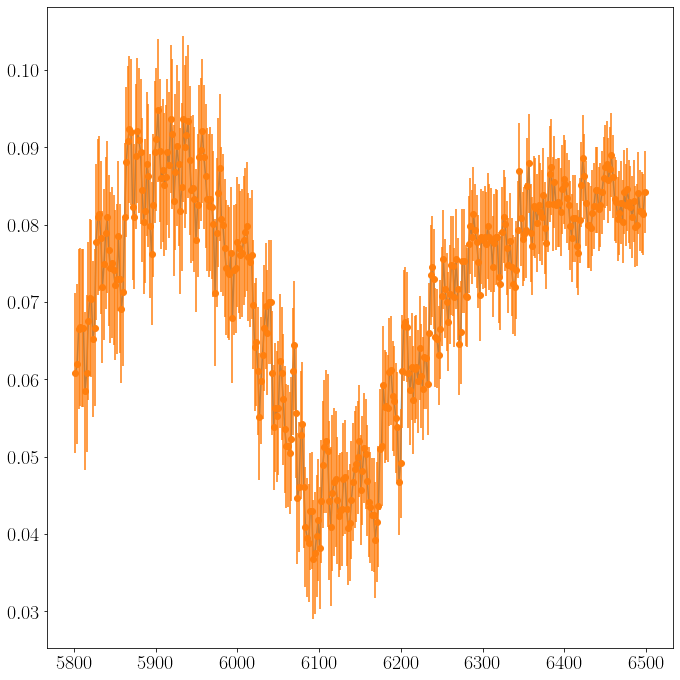

In [8]:
Spec1.plot_line_region(5800, 6500)

In [9]:
Spec1.add_line('SiII_6355', 5870, 6450, lines=[6371.359, 6347.103])
Spec1.line['SiII_6355'].LS_estimator()

LS estimation:
Velocity 1: -11252 km/s


Normalize factor = 0.612


  6%|██▏                                  | 3000/50000 [00:23<06:14, 125.57it/s]


MCMC results:
Velocity 1: -11239 pm 75 km/s


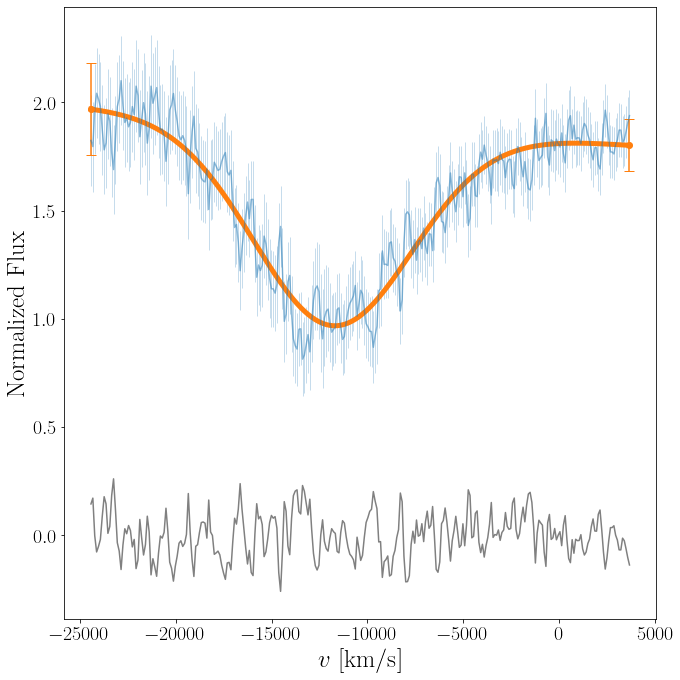

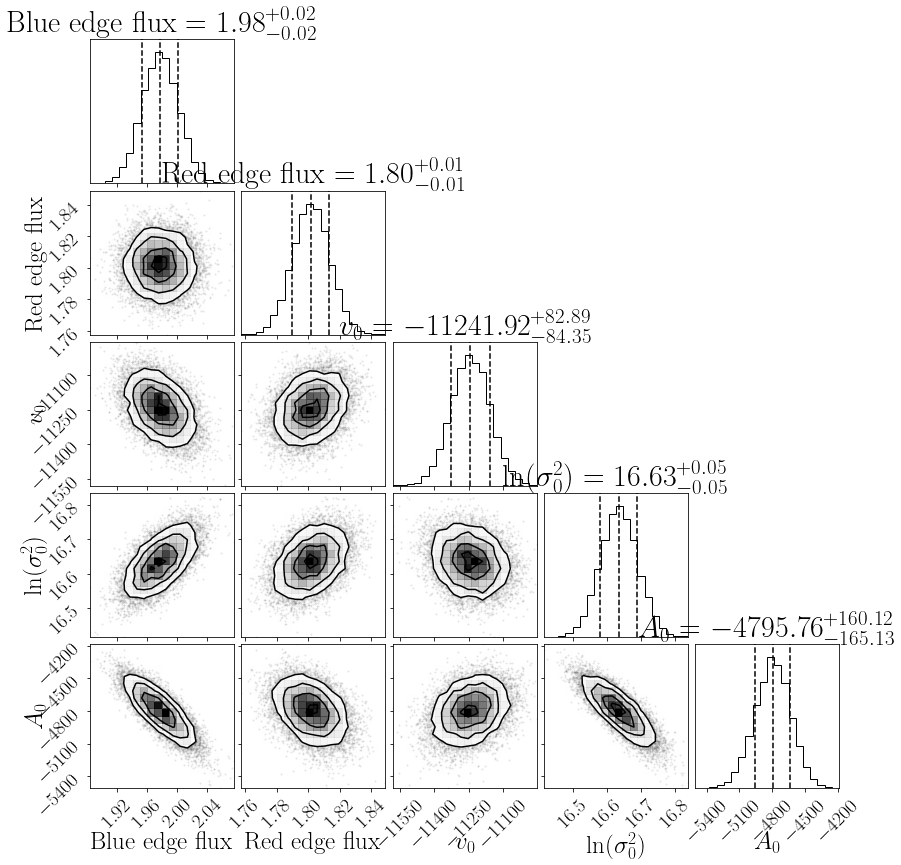

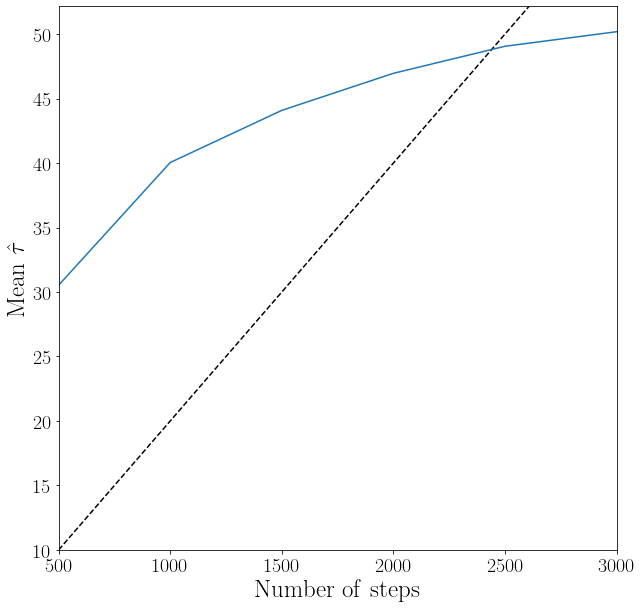

In [10]:
sampler = Spec1.line['SiII_6355'].MCMC_sampler(
    initial=Spec1.line['SiII_6355'].theta_MCMC,
    normalize_unc='LS',
    Plot_mcmc=True,
    Plot_tau=True)

## Ca II IRT

<AxesSubplot:>

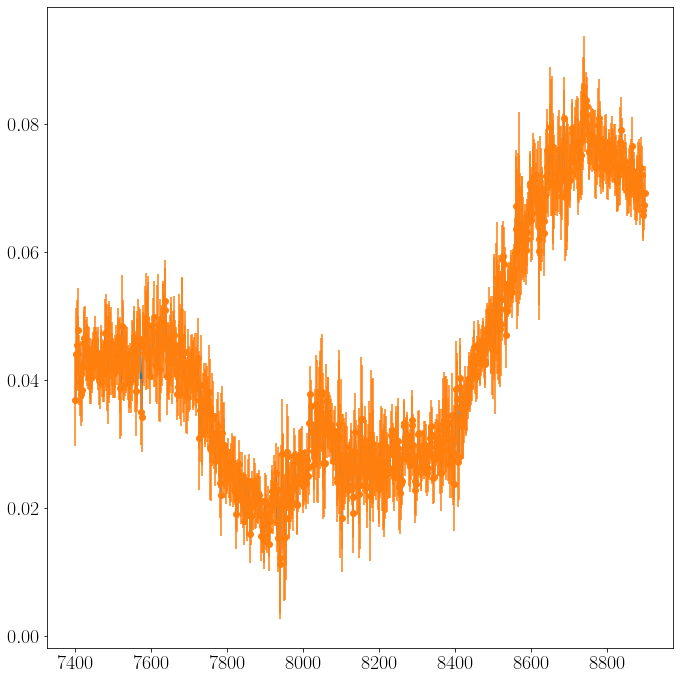

In [11]:
Spec1.plot_line_region(7400, 8900)

In [12]:
Spec1.add_line('CaII_IRT/CaII_IRT',
               7580,
               8790,
               lines=[[8498.018, 8542.089, 8662.140],
                      [8498.018, 8542.089, 8662.140]],
               rel_strength=[[], []])
Spec1.line['CaII_IRT/CaII_IRT'].LS_estimator(guess=(1, 1, -25000, 15, -1000,
                                                    -12000, 15, -1000))

LS estimation:
Velocity 1: -24611 km/s
Velocity 2: -9411 km/s


Normalize factor = 0.610


100%|███████████████████████████████████████| 1000/1000 [00:17<00:00, 58.31it/s]


MCMC results:
Velocity 1: -24632 pm 690 km/s
Velocity 2: -9463 pm 2201 km/s
Normalize factor = 0.617


  9%|███▍                                  | 4500/50000 [01:20<13:29, 56.23it/s]

MCMC results:
Velocity 1: -24584 pm 114 km/s
Velocity 2: -9401 pm 128 km/s


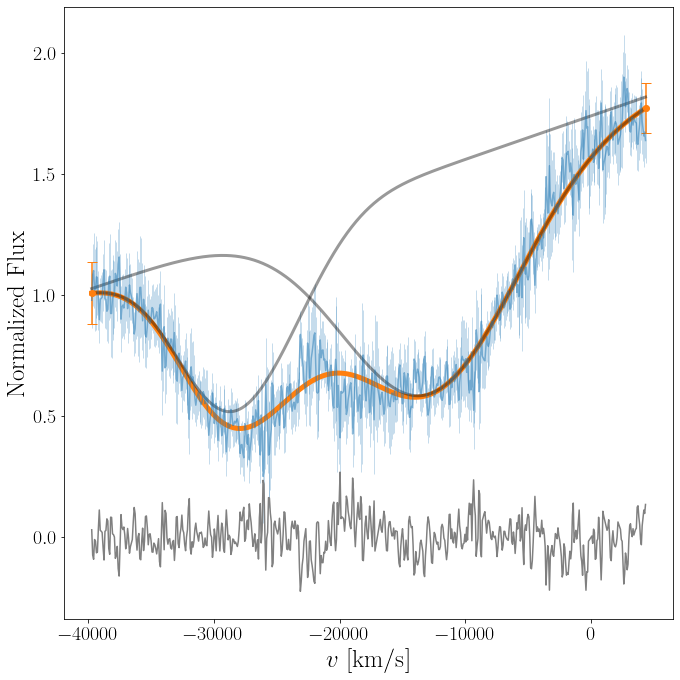

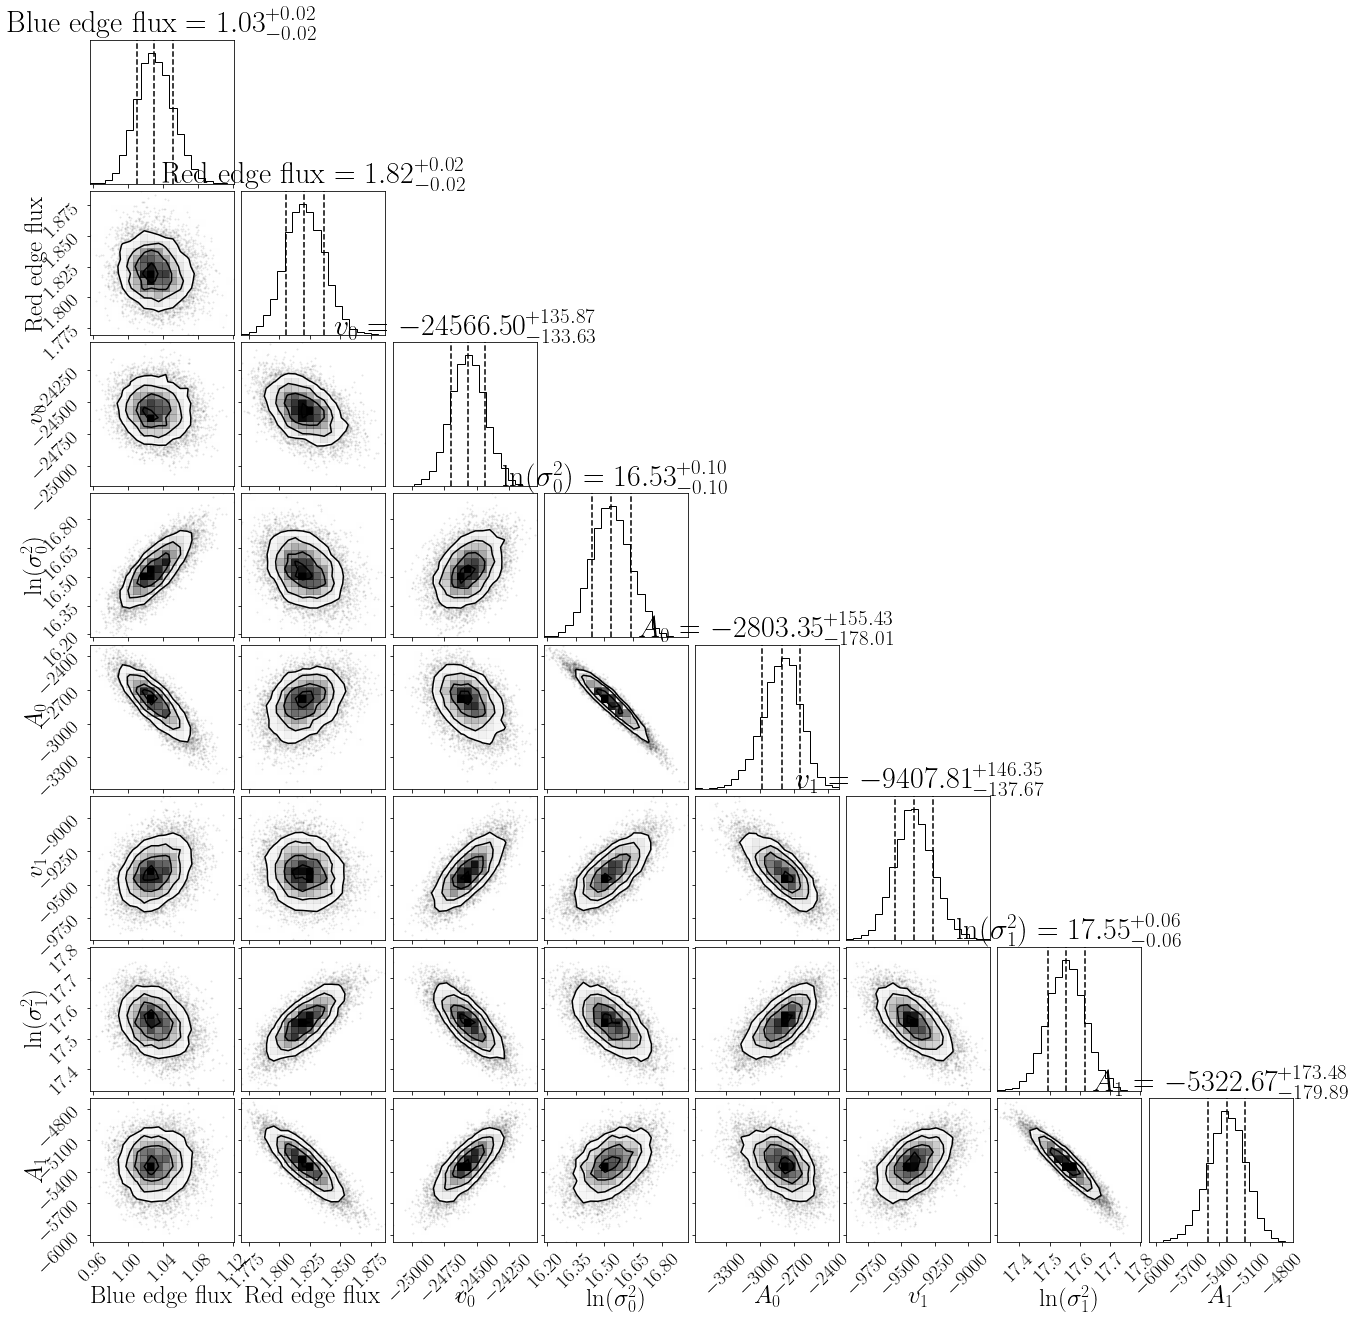

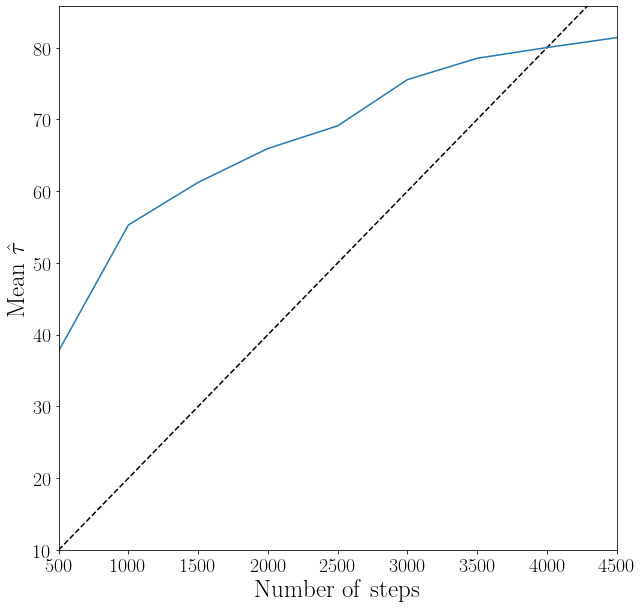

In [13]:
mu1 = -24000
mu2 = -11256
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=[1, 1, -25000, 15, -1000, -12000, 15, -1000],
    normalize_unc='LS',
    max_nsteps=1000,
    Plot_model=False)
sampler = Spec1.line['CaII_IRT/CaII_IRT'].MCMC_sampler(
    mu_prior=[mu1, mu2],
    var_prior=[1e7, 1e7],
    initial=Spec1.line['CaII_IRT/CaII_IRT'].theta_MCMC,
    normalize_unc='MCMC',
    Plot_mcmc=True,
    Plot_tau=True)

<AxesSubplot:>

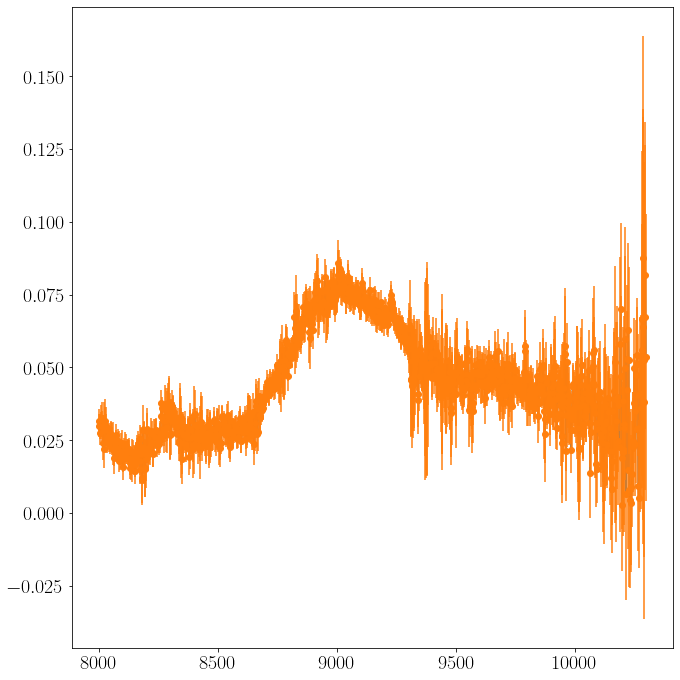

In [9]:
Spec.plot_line_region(8000, 10300)